In [39]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(300, 2)
(300,)


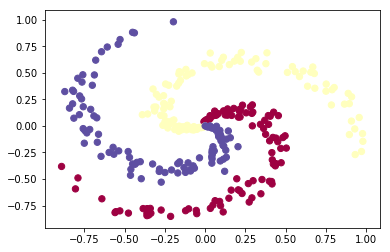

In [40]:
def get_data():
    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 3 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    return X, y, K
    
X, y, K = get_data()
print(X.shape)
print(y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [41]:
W = 0.01 * np.random.randn(X.shape[1], K)
b = np.zeros((1, K))

In [42]:
scores = np.dot(X, W) + b

In [43]:
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [44]:
correct_logprobs = -np.log(probs[range(X.shape[0]),y])


In [45]:
reg = 1e-3
data_loss = np.sum(correct_logprobs)/X.shape[0]
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [46]:
loss

1.0993717211632492

In [49]:
print(probs.shape)
dscores = (probs - 1) / X.shape[0]
print(dscores.shape)
dW = np.dot(X.T, dscores)
print(dW.shape)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

(300, 3)
(300, 3)
(2, 3)


In [50]:
dW

array([[0.01089609, 0.01055401, 0.01098967],
       [0.01967894, 0.01942567, 0.01836398]])

In [51]:
dW.shape

(2, 3)

In [52]:
db.shape

(1, 3)

In [54]:
b.shape

(1, 3)